<a href="https://colab.research.google.com/github/Benji263/ML_Solubility/blob/main/First_ML_Project_Data_Professor_08182023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')

In [3]:
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [4]:
y=df['logS']
x=df.drop('logS', axis=1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=100)

### Model building

Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

## making prediction

In [8]:
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

### Evaluate Model Performance

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)
lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test, y_lr_test_pred)

In [11]:
print('Mse for Train_set:' ,  lr_train_mse)
print('R2 for the train:' ,  lr_train_r2)
print('Mse for the test_set:' , lr_test_mse)
print('R2 for the test_set:' ,lr_test_r2)

Mse for Train_set: 1.0075362951093687
R2 for the train: 0.7645051774663391
Mse for the test_set: 1.0206953660861033
R2 for the test_set: 0.7891616188563282


In [12]:
lr_results=pd.DataFrame(['LinearRegression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns=['Methods','Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']

In [13]:
lr_results

,Methods,Training MSE,Training R2,Testing MSE,Testing R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
rf=RandomForestRegressor(max_depth=9, random_state=100)
rf.fit(x_train,y_train)



RandomForestRegressor(max_depth=9, random_state=100)

In [16]:
y_rf_train_pred=rf.predict(x_train)
y_rf_test_pred=rf.predict(x_test)


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)
rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test, y_rf_test_pred)

In [19]:
rf_results=pd.DataFrame(['Random Forest Regression',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=['Methods','Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']

In [20]:
rf_results

,Methods,Training MSE,Training R2,Testing MSE,Testing R2
0,Random Forest Regression,0.153219,0.964187,0.650335,0.865664


## Model Comparison

In [21]:
data_moduls=pd.concat([lr_results,rf_results], axis=0).reset_index(drop=True)

In [22]:
data_moduls

,Methods,Training MSE,Training R2,Testing MSE,Testing R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162
1,Random Forest Regression,0.153219,0.964187,0.650335,0.865664


### Data Visualization

In [23]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental LogS')

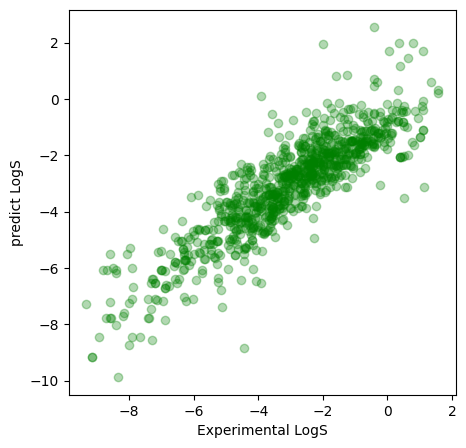

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_lr_train_pred, c='green', alpha=0.3)
plt.ylabel('predict LogS')
plt.xlabel('Experimental LogS')
